# Import and some path preparation

In [3]:
import glob
import os
from collections import Counter
from pathlib import Path
from random import Random

import numpy as np
from PIL import Image
import shutil
from IPython.core.display import HTML
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
main_szum_path = "C:/Pliki/studia/sem1/szum"

In [5]:
datasets = {
    "Recognize Animals": f"{main_szum_path}/datasets/data1",
    "Unsplash": f"{main_szum_path}/datasets/data4",
    "Smoker Detection [Image] classification Dataset": f"{main_szum_path}/datasets/data3",
}

# Merging test/valid/train in datasets

## Smoker Detection [Image] classification Dataset separation

In [19]:
try:
    os.mkdir(f"{datasets["Smoker Detection [Image] classification Dataset"]}/not_smoking")
except FileExistsError:
    pass
try:
    os.mkdir(f"{datasets["Smoker Detection [Image] classification Dataset"]}/smoking")
except FileExistsError:
    pass

lista = glob.glob(f"{datasets["Smoker Detection [Image] classification Dataset"]}/**/notsmoking*.*",recursive=True)
for file in lista:
    Path(file).rename(f"{datasets["Smoker Detection [Image] classification Dataset"]}/not_smoking/{os.path.basename(file)}")

lista = glob.glob(f"{datasets["Smoker Detection [Image] classification Dataset"]}/**/smoking*.*",recursive=True)
for file in lista:
    Path(file).rename(f"{datasets["Smoker Detection [Image] classification Dataset"]}/smoking/{os.path.basename(file)}")

## Recognize Animals separation

In [23]:
try:
    os.mkdir(f"{datasets["Recognize Animals"]}/none")
except FileExistsError:
    pass

lista = glob.glob(f"{datasets["Recognize Animals"]}/**/*.*",recursive=True)
for file in lista:
    Path(file).rename(f"{datasets["Recognize Animals"]}/none/{os.path.basename(file)}")

# Dataset statistics

In [24]:
datasets_lists = []
for key, value in datasets.items():
    print(f"Processing: {key}")
    smoking_list = glob.glob(f"{value}/smoking/*.*")
    not_smoking_list = glob.glob(f"{value}/not_smoking/*.*")
    none_list = glob.glob(f"{value}/none/*.*")
    all_list = glob.glob(f"{value}/**/*.*",recursive=True)

    image_list = []
    for i in all_list:
        try:
            with Image.open(i) as img:
                img.convert('RGB')
                image_list.append(img)
        except Exception as e:
            pass
    datasets_lists.append({
        "key": key,
        "smoking_list": smoking_list,
        "not_smoking_list": not_smoking_list,
        "none_list": none_list,
        "image_list": image_list,
        "all_list": all_list,
    })

Processing: Recognize Animals
Processing: Unsplash
Processing: Smoker Detection [Image] classification Dataset


In [25]:
for data in datasets_lists:
    size_list = [i.size for i in data["image_list"]]
    type_count_list = Counter([i.format for i in data["image_list"]])
    display()
    display(HTML(f"""
        <h1>{data["key"]}</h1>
        <p><b>Smoking count:</b> {len(data["smoking_list"])} ({len(data["smoking_list"])/len(data["all_list"]) * 100}%)</p>
        <p><b>Not smoking count:</b> {len(data["not_smoking_list"])} ({len(data["not_smoking_list"])/len(data["all_list"]) * 100}%)</p>
        <p><b>none count:</b> {len(data["none_list"])} ({len(data["none_list"])/len(data["all_list"]) * 100}%)</p>
        <p><b>Max size:</b> {max(size_list)}; <b>Min size:</b> {min(size_list)}</p>
        <p><b>Type count:</b></p> <ul>{"".join([f"<li>{k}: {v}</li>" for k,v in type_count_list.items()])}</ul>
    """))

# Merging all datasets to one

In [6]:
paths = [
    f"{main_szum_path}/not_smoking",
    f"{main_szum_path}/smoking",
    f"{main_szum_path}/none"
]

In [27]:
for data in datasets_lists:
    for i in paths:
        try:
            os.mkdir(i)
        except FileExistsError:
            pass
        for file in data[f"{os.path.basename(i)}_list"]:
            shutil.copy(file, f"{i}/{os.path.basename(file)}")

In [28]:
lista = [(os.path.basename(path),len(glob.glob(f"{path}/*.*"))) for path in paths]
all_count = sum([v for _,v in lista])
display(HTML(f"""
    <h1>Merged datasets</h1>
    <ul>{"".join([f"<li><b>{k}:</b> {v} ({v/all_count *100}%)</li>" for k, v in lista])}</ul>
"""))

## Filter images based on their size

In [29]:
for path in paths:
    small_photo = []
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        if os.path.isfile(filepath):
            try:
                with Image.open(filepath) as img:
                    width, height = img.size
                    if width < 224 or height < 224:
                        small_photo.append(filepath)
            except Exception as e:
                print(f"Error in open {filename}: {e}")

    try:
        os.mkdir(f"{path}\\small_photo")
    except FileExistsError:
        pass
    for file in small_photo:
        Path(file).rename(f"{path}/small_photo/{os.path.basename(file)}")

Error in open filenames.txt: cannot identify image file 'C:/Pliki/studia/sem1/szum/none\\filenames.txt'
Error in open filenames_elefante_train.txt: cannot identify image file 'C:/Pliki/studia/sem1/szum/none\\filenames_elefante_train.txt'


FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: 'C:\\Pliki\\studia\\sem1\\szum\\none\\eb32b3082ef1053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg' -> 'C:/Pliki/studia/sem1/szum/none/small_photo/eb32b3082ef1053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg'

In [30]:
lista = [(os.path.basename(path),len(glob.glob(f"{path}/*.*"))) for path in paths]
all_count = sum([v for _,v in lista])
display(HTML(f"""
    <h1>Merged datasets after size filter</h1>
    <ul>{"".join([f"<li><b>{k}:</b> {v} ({v/all_count *100}%)</li>" for k, v in lista])}</ul>
"""))

## Filter images based on their format/type

In [13]:
for path in paths:
    try:
        os.mkdir(f"{path}/not_jpg")
    except FileExistsError:
        pass
    for filename in [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]:
        if Path(filename).suffix.lower() not in ['.jpg', '.jpeg']:
            Path(f"{path}/{filename}").rename(f"{path}/not_jpg/{filename}")

In [31]:
lista = [(os.path.basename(path),len(glob.glob(f"{path}/*.*"))) for path in paths]
all_count = sum([v for _,v in lista])
display(HTML(f"""
    <h1>Merged datasets after format filter</h1>
    <ul>{"".join([f"<li><b>{k}:</b> {v} ({v/all_count *100}%)</li>" for k, v in lista])}</ul>
"""))

In [7]:
def get_all_images():
    result = []
    for i, path in enumerate(paths):
        for j in glob.glob(f"{path}/*.*"):
            try:
                with Image.open(j) as img:
                    result.append((np.array(img), i))
            except Exception as e:
                pass
    return result
image_list = get_all_images()

dfs


In [42]:
def standardization(dataset):
    mean = np.mean((np.concatenate([arr.flatten() for arr in [i for i,j in dataset]])))
    std = np.std((np.concatenate([arr.flatten() for arr in [i for i,j in dataset]])))
    return [((image - mean) / std,label) for image, label in dataset]



MemoryError: Unable to allocate 21.8 GiB for an array with shape (2932212512,) and data type float64

In [11]:
def normalization(dataset):
    normalized_dataset = []
    for image, label in dataset:
        normalized_image = (image / 255.0).astype(np.float32)
        normalized_dataset.append((normalized_image, label))
    return normalized_dataset

In [8]:
import random


def create_split(dataset):
    label_0 = [item for item in dataset if item[1] == 0]
    label_1 = [item for item in dataset if item[1] == 1]
    label_2 = [item for item in dataset if item[1] == 2]
    
    def split_group(group):
        random.shuffle(group)
        train = group[:int(len(group)*0.8)]
        val = group[int(len(group)*0.8):int(len(group)*0.9)]
        test = group[int(len(group)*0.9):]
        return train, val, test
    
    train_0, val_0, test_0 = split_group(label_0)
    train_1, val_1, test_1 = split_group(label_1)
    train_2, val_2, test_2 = split_group(label_2)
    
    train_set = train_0 + train_1 + train_2
    val_set = val_0 + val_1 + val_2
    test_set = test_0 + test_1 + test_2
    
    return train_set, val_set, test_set



In [34]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    fill_mode='nearest'
)
for path in paths:
    try:
        os.mkdir(f"{path}/augmented")
        i = 0
        gen = datagen.flow_from_directory(path, save_to_dir=path+'/augmented',classes=['.'], batch_size=1)
        for i in range(1060*5):
            next(gen)
    except FileExistsError:
        pass

Found 13798 images belonging to 1 classes.


In [9]:
def create_split_2(dataset):
    label_0 = [item for item in dataset if item[1] == 0]
    label_1 = [item for item in dataset if item[1] == 1]
    label_2 = [item for item in dataset if item[1] == 2]
    
    def split_group(group):
        random.shuffle(group)
        group = group[:1060]
        
        train = group[:int(len(group)*0.8)]
        val = group[int(len(group)*0.8):int(len(group)*0.9)]
        test = group[int(len(group)*0.9):]
        return train, val, test
    
    train_0, val_0, test_0 = split_group(label_0)
    train_1, val_1, test_1 = split_group(label_1)
    train_2, val_2, test_2 = split_group(label_2)
    
    train_set = train_0 + train_1 + train_2
    val_set = val_0 + val_1 + val_2
    test_set = test_0 + test_1 + test_2
    
    return train_set, val_set, test_set

In [10]:
def create_split_3(dataset):
    label_0 = [item for item in dataset if item[1] == 0]
    label_1 = [item for item in dataset if item[1] == 1]
    label_2 = [item for item in dataset if item[1] == 2]
    
    def split_group(group):
        random.shuffle(group)
        group = group[:1060]
        
        train = group[:int(len(group)*0.8)]
        val = group[int(len(group)*0.7):int(len(group)*0.8)]
        test = group[int(len(group)*0.9):]
        return train, val, test
    
    train_0, val_0, test_0 = split_group(label_0)
    train_1, val_1, test_1 = split_group(label_1)
    train_2, val_2, test_2 = split_group(label_2)
    
    train_set = train_0 + train_1 + train_2
    val_set = val_0 + val_1 + val_2
    test_set = test_0 + test_1 + test_2
    
    return train_set, val_set, test_set


In [11]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np

NUM_CLASSES = 3
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
MODEL_NAME = "efficientnet_b0"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image, label = self.data[idx]
        image = Image.fromarray(image).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [29]:
import timm
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

def train_and_validate(split_name, train_set, val_set, save_path, num_epochs, normalize):
    if normalize:
        transform_train = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomAffine(
                degrees=20,
                translate=(0.1, 0.1),
                scale=(0.8, 1.2), 
                shear=0.2
            ),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ColorJitter(brightness=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
        ])
        transform_val = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
        ])
    else:
        transform_train = transform_val = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Lambda(lambda x: torch.from_numpy(np.array(x)).permute(2, 0, 1).float())
        ])
    train_dataset = CustomDataset(train_set, transform=transform_train)
    val_dataset = CustomDataset(val_set, transform=transform_val)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    print(len(train_loader.dataset))
    print(len(val_loader.dataset))

    model = timm.create_model(MODEL_NAME, pretrained=True, num_classes=NUM_CLASSES)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_loss = float("inf")
    best_model_state = None

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in tqdm(train_loader, desc=f"[{split_name}] Epoch {epoch+1}/{num_epochs}"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = running_corrects.float() / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc.item())

        model.eval()
        running_loss = 0.0
        running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        val_loss = running_loss / len(val_loader.dataset)
        val_acc = running_corrects.float() / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())
        
        print(f"[{split_name}] Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()

    torch.save(best_model_state, save_path)
    print(f"[{split_name}] Saved best model to {save_path} with Val Loss: {best_val_loss:.4f}")

    epochs = range(1, len(train_losses) + 1) 
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{split_name} - Loss Curve")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{split_name} - Accuracy Curve")
    plt.grid(True)
    plt.show()
    

8980
1123


[SPLIT1] Epoch 1/3: 100%|██████████| 281/281 [19:53<00:00,  4.25s/it]


[SPLIT1] Epoch 1: Train Loss = 0.3077, Train Acc: 0.9135, Val Loss = 0.1768, Val Acc = 0.9439


[SPLIT1] Epoch 2/3: 100%|██████████| 281/281 [19:35<00:00,  4.18s/it]


[SPLIT1] Epoch 2: Train Loss = 0.0395, Train Acc: 0.9847, Val Loss = 0.1509, Val Acc = 0.9501


[SPLIT1] Epoch 3/3: 100%|██████████| 281/281 [19:39<00:00,  4.20s/it]


[SPLIT1] Epoch 3: Train Loss = 0.0196, Train Acc: 0.9942, Val Loss = 0.1402, Val Acc = 0.9546
[SPLIT1] Saved best model to MODEL1.pth with Val Loss: 0.1402


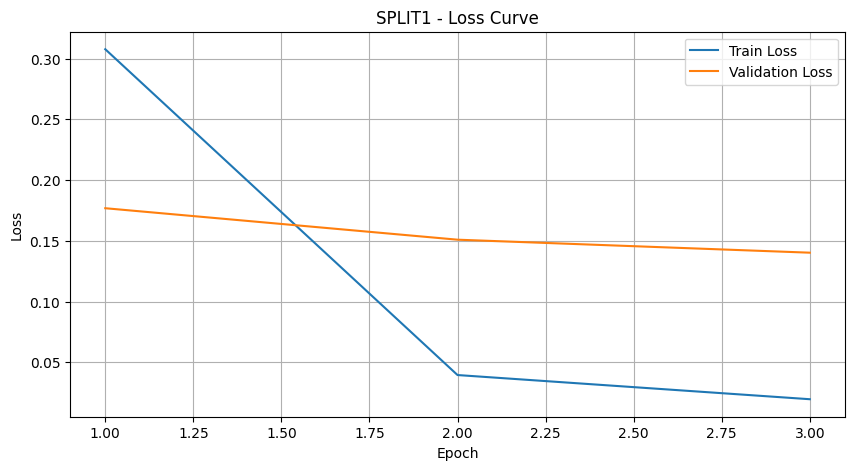

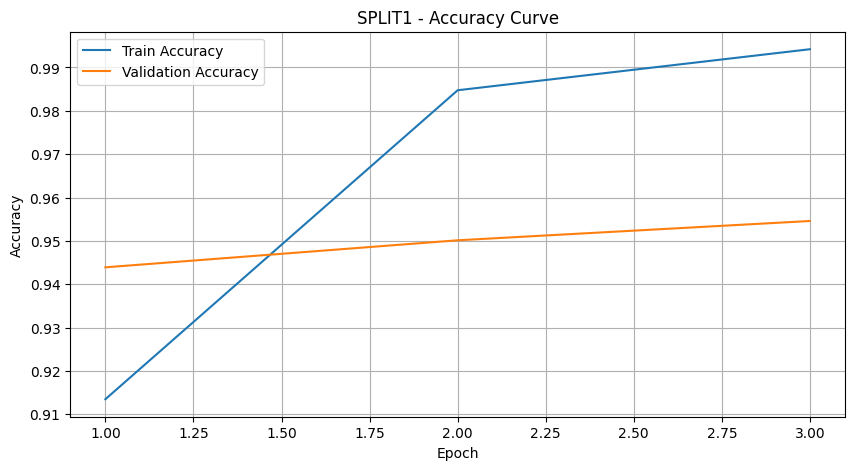

In [35]:
train1, val1, test1 = create_split(image_list)
train_and_validate("SPLIT1", train1, val1, "MODEL1.pth", 3, False)

In [36]:
import pickle

with open('train1.pkl', 'wb') as f:
    pickle.dump(train1, f)
    
with open('val1.pkl', 'wb') as f:
    pickle.dump(val1, f)
    
with open('test1.pkl', 'wb') as f:
    pickle.dump(test1, f)

2544
318


[SPLIT2] Epoch 1/5: 100%|██████████| 80/80 [07:01<00:00,  5.27s/it]


[SPLIT2] Epoch 1: Train Loss = 1.2196, Train Acc: 0.7103, Val Loss = 0.8252, Val Acc = 0.7799


[SPLIT2] Epoch 2/5: 100%|██████████| 80/80 [06:30<00:00,  4.88s/it]


[SPLIT2] Epoch 2: Train Loss = 0.5123, Train Acc: 0.8483, Val Loss = 0.6498, Val Acc = 0.8019


[SPLIT2] Epoch 3/5: 100%|██████████| 80/80 [06:19<00:00,  4.74s/it]


[SPLIT2] Epoch 3: Train Loss = 0.3333, Train Acc: 0.8876, Val Loss = 0.6123, Val Acc = 0.8270


[SPLIT2] Epoch 4/5: 100%|██████████| 80/80 [05:52<00:00,  4.40s/it]


[SPLIT2] Epoch 4: Train Loss = 0.1976, Train Acc: 0.9261, Val Loss = 0.6808, Val Acc = 0.8176


[SPLIT2] Epoch 5/5: 100%|██████████| 80/80 [05:45<00:00,  4.31s/it]


[SPLIT2] Epoch 5: Train Loss = 0.1587, Train Acc: 0.9403, Val Loss = 0.6195, Val Acc = 0.8302
[SPLIT2] Saved best model to MODEL2.pth with Val Loss: 0.6123


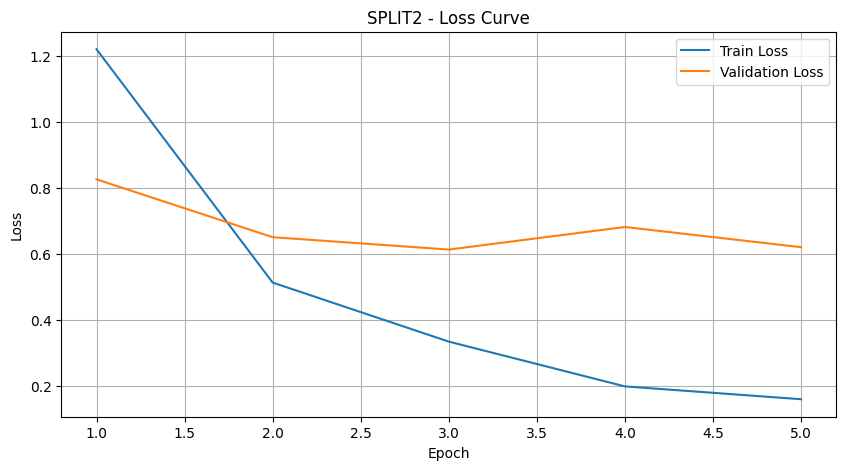

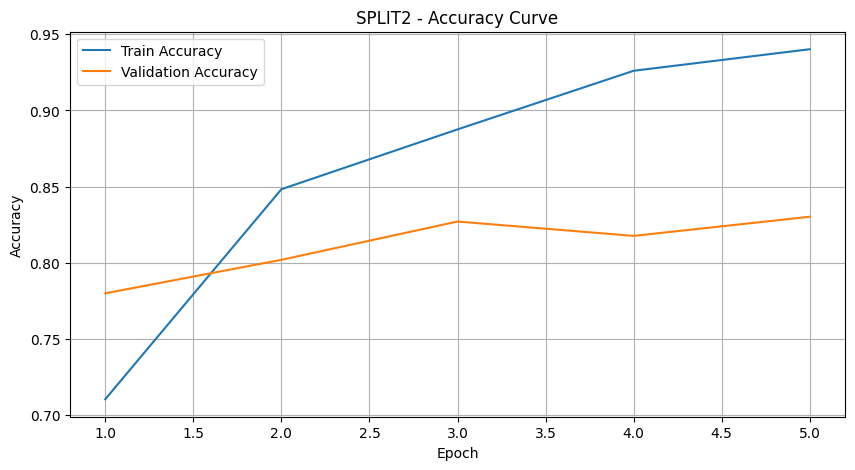

In [20]:
train2, val2, test2 = create_split_2(image_list)
train_and_validate("SPLIT2", train2, val2, "MODEL2.pth", 5, True)


In [33]:
import pickle

with open('train2.pkl', 'wb') as f:
    pickle.dump(train2, f)
    
with open('val2.pkl', 'wb') as f:
    pickle.dump(val2, f)
    
with open('test2.pkl', 'wb') as f:
    pickle.dump(test2, f)

2544
318


[SPLIT3] Epoch 1/5: 100%|██████████| 80/80 [05:10<00:00,  3.88s/it]


[SPLIT3] Epoch 1: Train Loss = 1.3158, Train Acc: 0.6796, Val Loss = 0.4378, Val Acc = 0.8396


[SPLIT3] Epoch 2/5: 100%|██████████| 80/80 [05:10<00:00,  3.88s/it]


[SPLIT3] Epoch 2: Train Loss = 0.4767, Train Acc: 0.8459, Val Loss = 0.2859, Val Acc = 0.8994


[SPLIT3] Epoch 3/5: 100%|██████████| 80/80 [05:04<00:00,  3.80s/it]


[SPLIT3] Epoch 3: Train Loss = 0.3513, Train Acc: 0.8880, Val Loss = 0.1548, Val Acc = 0.9528


[SPLIT3] Epoch 4/5: 100%|██████████| 80/80 [05:04<00:00,  3.80s/it]


[SPLIT3] Epoch 4: Train Loss = 0.2176, Train Acc: 0.9265, Val Loss = 0.0892, Val Acc = 0.9591


[SPLIT3] Epoch 5/5: 100%|██████████| 80/80 [05:00<00:00,  3.76s/it]


[SPLIT3] Epoch 5: Train Loss = 0.1746, Train Acc: 0.9340, Val Loss = 0.0670, Val Acc = 0.9654
[SPLIT3] Saved best model to MODEL3.pth with Val Loss: 0.0670


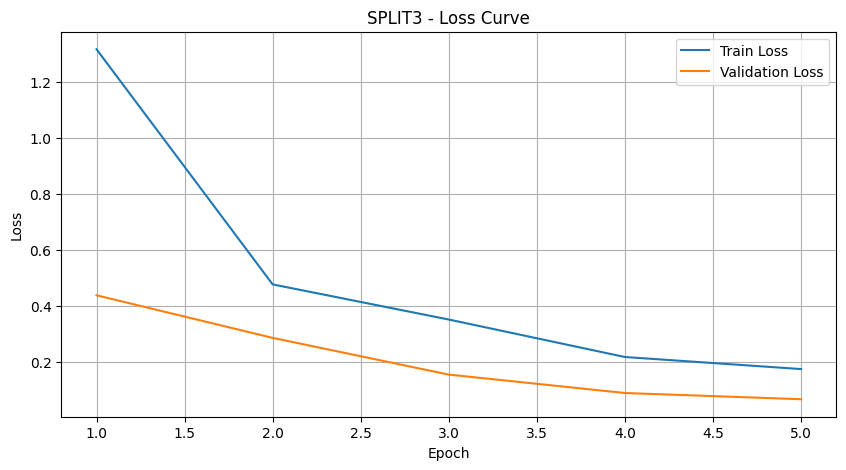

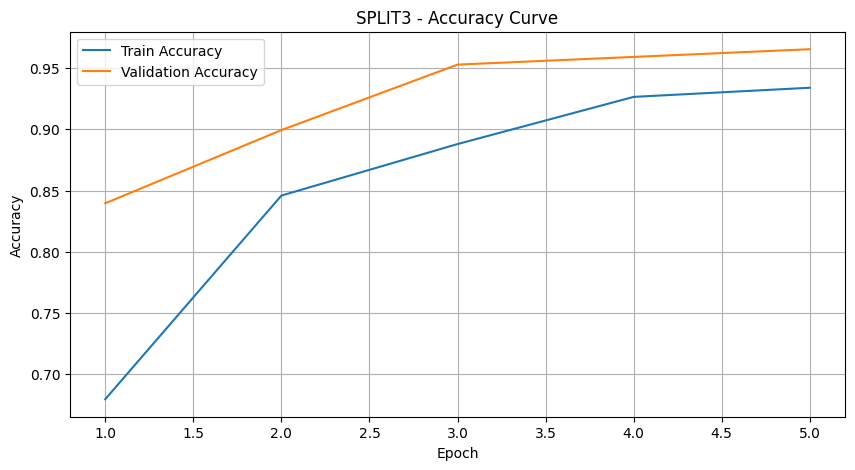

In [31]:
train3, val3, test3 = create_split_3(image_list)
train_and_validate("SPLIT3", train3, val3, "MODEL3.pth", 5, True)

In [34]:
import pickle

with open('train3.pkl', 'wb') as f:
    pickle.dump(train3, f)
    
with open('val3.pkl', 'wb') as f:
    pickle.dump(val3, f)
    
with open('test3.pkl', 'wb') as f:
    pickle.dump(test3, f)

